<a href="https://colab.research.google.com/github/USE-Computer-Science/lectures/blob/main/statistics/1.%20Statistics%20(march).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
grade = {
    1:	7,
    2:	14,
    3:	20,
    4:	27,
    5:	34,
    6:	40,
    7:	43,
    8:	46,
    9:	48,
    10:	51,
    11:	54,
    12:	56,
    13:	59,
    14:	62,
    15:	64,
    16:	67,
    17:	70,
    18:	72,
    19:	75,
    20:	78,
    21:	80,
    22:	83,
    23:	85,
    24:	88,
    25:	90,
    26:	93,
    27:	95,
    28:	98,
    29:	100
}

In [ ]:
#@title
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
#df = pd.read_csv('results_march.tsv', sep='\t', decimal=',')

url = "https://github.com/USE-Computer-Science/lectures/blob/main/statistics/data/results_march.tsv?raw=true"
df = pd.read_csv(url, sep='\t', decimal=',')
df['solved_1t_prc'][df['unsolved'] > 9] = 0
df['task_point'] = (df.solved_1t_prc >= 0.55).astype(int)
dfa = df[df.learner == 'Артём']
dfd = df[df.learner == 'Данил']
dfc = df[df.learner == 'Камилла']
df.head()

# **Артём**

## **Задачи, решённые с 1 попытки (Артём)**

In [ ]:
#@title
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfa.task, y=dfa.solved_1t, fill='tozeroy')) # fill down to xaxis
fig.update_xaxes(type='category')

fig.update_layout(
    title="Количество задач, решённых с первой попытки",
    xaxis_title="Задача ЕГЭ",
    yaxis_title="# решённых с 1 попытки задач",
    legend_title="Ученик",
    font=dict(family="Arial", size=16))

fig.show()

## **Нерешённые задачи (Артём)**

In [ ]:
#@title
fig = px.bar(dfa, x='task_ID', y='unsolved', color_discrete_sequence=['indianred'])
fig.update_xaxes(type='category')
fig.update_layout(
    title="Количество нерешённых задач",
    xaxis_title="Номер задачи ЕГЭ",
    yaxis_title="Количество нерешённых задач",
    font=dict(family="Arial", size=16))
fig.show()

## **Эмпирическая оценка результата экзамена (Артём)**

In [ ]:
#@title
data0 = go.Scatter(
    x = dfa.task,
    y = dfa.solved_1t_prc,
    name = 'с 1 раза, %',
    #text = df.Women,
    mode = 'markers + lines'
)

data1 = go.Bar(
    x = dfa.task,
    y = dfa.task_point,
    name = 'Первичный балл',
)

data = [data0, data1]
layout = go.Layout(title = 'Ожидаемый экзаменационный балл (эмпирически)', barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
#fig.update_xaxes(type='category')
fig.show()

In [ ]:
#@title
ae = sum(round(dfa.task_point))
print( f'Ожидаемый первичный балл (эмпирически): {ae}')
print( f'Ожидаемый балл экзамена (эмпирически): {grade[ae]}')

Ожидаемый первичный балл (эмпирически): 20
Ожидаемый балл экзамена (эмпирически): 78


## **Оценка результата экзамена по методу максимального правдоподобия (Артём)**

In [ ]:
#@title
data0 = go.Scatter(
    x = dfa.task,
    y = dfa.solved_1t_prc,
    name = 'с 1 раза, %',
    #text = df.Women,
    mode = 'markers + lines'
)

data1 = go.Bar(
    x = dfa.task,
    y = dfa.solved_1t_prc,
    name = 'Первичный балл',
)

data = [data0, data1]
layout = go.Layout(title = 'Ожидаемый экзаменационный балл по ММП', barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
#@title
am = sum(round(dfa.solved_1t_prc))
print( f'Ожидаемый первичный балл (ММП): {am}')
print( f'Ожидаемый балл экзамена (ММП): {grade[am]}')

Ожидаемый первичный балл (ММП): 20.0
Ожидаемый балл экзамена (ММП): 78


## **Проблемные номера (Артём)**

In [ ]:
#@title
fig = go.Figure()

# 1 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 20,
    title = {"text": "8. Комбинаторика <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "Решено с 1 попытки, %"},
    value = 40,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 0}))

# 2 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 20,
    title = {"text": "11. Количество информации <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "Решено с 1 попытки, %"},
    value = 50,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 1}))

# 3 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 20,
    title = {"text": "23. Деревья вариантов <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 2}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "Решено с 1 попытки, %"},
    value = 40,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 2}))

# 4 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 16,
    title = {"text": "24. Обработка строк <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 3}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "Решено с 1 попытки, %"},
    value = 38,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 3}))

fig.update_layout(
    grid = {'rows': 2, 'columns': 4, 'pattern': "independent"},)

## **Текущий прогресс (Артём)**

In [ ]:
#@title
aef = grade[ae]
amf = grade[am]
asolved = round((sum(dfa.solved) / len(dfa.solved) / 20) * 100)
asolved_1t = round(sum(dfa.solved_1t / sum(dfa.solved)) * 100)

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = aef,
    title = {"text": "Ожидаемый балл <br><span style='font-size:0.8em;color:gray'>""Эмпирически""</span><br>"},
    delta = {'reference': 85},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "решено задач, %"},
    value = asolved,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#1cbe4f'}},
    domain = {'row': 1, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = amf,
    title = {"text": "Ожидаемый балл <br><span style='font-size:0.8em;color:gray'>ММП</span><br>"},
    delta = {'reference': 85},
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "c 1 попытки, %"},
    value = asolved_1t,
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#1cbe4f'}},
    domain = {'x': [0.7, 1], 'y': [0.1, 0.25]}))


fig.update_layout(
    grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},)

# **Данил**

## **Задачи, решённые с 1 попытки (Данил)**

In [ ]:
#@title
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfd.task, y=dfd.solved_1t, fill='tozeroy')) # fill down to xaxis
fig.update_xaxes(type='category')

fig.update_layout(
    title="Количество задач, решённых с первой попытки",
    xaxis_title="Задача ЕГЭ",
    yaxis_title="# решённых с 1 попытки задач",
    font=dict(family="Arial", size=16))

fig.show()

## **Нерешённые задачи (Данил)**

In [ ]:
#@title
fig = px.bar(dfd, x='task_ID', y='unsolved', color_discrete_sequence=['indianred'])
fig.update_xaxes(type='category')
fig.update_layout(
    title="Количество нерешённых задач",
    xaxis_title="Номер задачи ЕГЭ",
    yaxis_title="Количество нерешённых задач",
    font=dict(family="Arial", size=16))
fig.show()

## **Эмпирическая оценка результата экзамена (Данил)**

In [ ]:
#@title
data0 = go.Scatter(
    x = dfd.task,
    y = dfd.solved_1t_prc,
    name = 'с 1 раза, %',
    mode = 'markers + lines'
)

data1 = go.Bar(
    x = dfd.task,
    y = dfd.task_point,
    name = 'Первичный балл',
)

data = [data0, data1]
layout = go.Layout(title = 'Ожидаемый экзаменационный балл (эмпирически)', barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
#fig.update_xaxes(type='category')
fig.show()

In [ ]:
#@title
de = sum(round(dfd.task_point))
print( f'Ожидаемый первичный балл (эмпирически): {de}')
print( f'Ожидаемый балл экзамена (эмпирически): {grade[de]}')

Ожидаемый первичный балл (эмпирически): 15
Ожидаемый балл экзамена (эмпирически): 64


## **Оценка результата экзамена по методу максимального правдоподобия (Данил)**

In [ ]:
#@title
data0 = go.Scatter(
    x = dfd.task,
    y = dfd.solved_1t_prc,
    name = 'с 1 раза, %',
    #text = df.Women,
    mode = 'markers + lines'
)

data1 = go.Bar(
    x = dfd.task,
    y = dfd.solved_1t_prc,
    name = 'Первичный балл',
)

data = [data0, data1]
layout = go.Layout(title = 'Ожидаемый экзаменационный балл по ММП', barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
#@title
dm = sum(round(dfd.solved_1t_prc))
print( f'Ожидаемый первичный балл (ММП): {dm}')
print( f'Ожидаемый балл экзамена (ММП): {grade[dm]}')

Ожидаемый первичный балл (ММП): 16.0
Ожидаемый балл экзамена (ММП): 67


## **Проблемные номера (Данил)**

In [ ]:
#@title
fig = go.Figure()

# 1 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 7,
    title = {"text": "4.Условие Фано <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "С 1 попытки, %"},
    value = 57,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 0}))

# 2 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 20,
    title = {"text": "13.Пути в графах <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "С 1 попытки, %"},
    value = 30,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 1}))

# 3 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 15,
    title = {"text": "15.Логика <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 2}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "С 1 попытки, %"},
    value = 40,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 2}))

# 4 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 19,
    title = {"text": "23.Деревья вариантов <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 3}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "С 1 попытки, %"},
    value = 53,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 3}))

# 5 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 16,
    title = {"text": "24.Обработка строк <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 4}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "С 1 попытки, %"},
    value = 50,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 4}))

# 6 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 9,
    title = {"text": "25.Обработка целых чисел <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 5}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "С 1 попытки, %"},
    value = 44,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 5}))

fig.update_layout(
    grid = {'rows': 2, 'columns': 6, 'pattern': "independent"},)

## **Текущий прогресс (Данил)**

In [ ]:
#@title
aef = grade[de]
amf = grade[dm]
asolved = round((sum(dfd.solved) / len(dfd.solved) / 20) * 100)
asolved_1t = round(sum(dfd.solved_1t / sum(dfd.solved)) * 100)

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = aef,
    title = {"text": "Ожидаемый балл <br><span style='font-size:0.8em;color:gray'>""Эмпирически""</span><br>"},
    delta = {'reference': 80},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "решено задач, %"},
    value = asolved,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#1cbe4f'}},
    domain = {'row': 1, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = amf,
    title = {"text": "Ожидаемый балл <br><span style='font-size:0.8em;color:gray'>ММП</span><br>"},
    delta = {'reference': 80},
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "c 1 попытки, %"},
    value = asolved_1t,
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#1cbe4f'}},
    domain = {'x': [0.7, 1], 'y': [0.1, 0.25]}))


fig.update_layout(
    grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},)

# **Камилла**

## **Задачи, решённые с 1 попытки (Камилла)**

In [ ]:
#@title
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfc.task, y=dfc.solved_1t, fill='tozeroy')) # fill down to xaxis
fig.update_xaxes(type='category')

fig.update_layout(
    title="Количество задач, решённых с первой попытки",
    xaxis_title="Задача ЕГЭ",
    yaxis_title="# решённых с 1 попытки задач",
    font=dict(family="Arial", size=16))

fig.show()

## **Нерешённые задачи (Камилла)**

In [ ]:
#@title
fig = px.bar(dfc, x='task_ID', y='unsolved', color_discrete_sequence=['indianred'])
fig.update_xaxes(type='category')
fig.update_layout(
    title="Количество нерешённых задач",
    xaxis_title="Номер задачи ЕГЭ",
    yaxis_title="Количество нерешённых задач",
    font=dict(family="Arial", size=16))
fig.show()

## **Эмпирическая оценка результата экзамена (Камилла)**

In [ ]:
#@title
data0 = go.Scatter(
    x = dfc.task,
    y = dfc.solved_1t_prc,
    name = 'с 1 раза, %',
    mode = 'markers + lines'
)

data1 = go.Bar(
    x = dfc.task,
    y = dfc.task_point,
    name = 'Первичный балл',
)

data = [data0, data1]
layout = go.Layout(title = 'Ожидаемый экзаменационный балл (эмпирически)', barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
#@title
ce = sum(round(dfc.task_point))
print( f'Ожидаемый первичный балл (эмпирически): {ce}')
print( f'Ожидаемый балл экзамена (эмпирически): {grade[ce]}')

Ожидаемый первичный балл (эмпирически): 15
Ожидаемый балл экзамена (эмпирически): 64


## **Оценка результата экзамена по методу максимального правдоподобия (Камилла)**

In [ ]:
#@title
data0 = go.Scatter(
    x = dfc.task,
    y = dfc.solved_1t_prc,
    name = 'с 1 раза, %',
    mode = 'markers + lines'
)

data1 = go.Bar(
    x = dfc.task,
    y = dfc.solved_1t_prc,
    name = 'Первичный балл',
)

data = [data0, data1]
layout = go.Layout(title = 'Ожидаемый экзаменационный балл по ММП', barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
#@title
cm = sum(round(dfd.solved_1t_prc))
print( f'Ожидаемый первичный балл (ММП): {cm}')
print( f'Ожидаемый балл экзамена (ММП): {grade[cm]}')

Ожидаемый первичный балл (ММП): 16.0
Ожидаемый балл экзамена (ММП): 67


## **Проблемные номера (Камилла)**

In [ ]:
#@title
fig = go.Figure()

# 1 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 8,
    title = {"text": "4.Условие Фано <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "С 1 попытки, %"},
    value = 36,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 0}))

# 3 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 16,
    title = {"text": "13.Пути в графах <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 2}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "С 1 попытки, %"},
    value = 44,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 2}))

# 2 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 19,
    title = {"text": "9.Электронные таблицы <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "С 1 попытки, %"},
    value = 32,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 1}))

# 4 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 19,
    title = {"text": "17.Последовательности <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 3}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "С 1 попытки, %"},
    value = 47,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 3}))

# 5 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 15,
    title = {"text": "18.Динамика(робот) <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 4}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "С 1 попытки, %"},
    value = 53,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 4}))

# 6 столбец
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 1,
    title = {"text": "25.Обработка целых чисел <br><span style='font-size:0.8em;color:gray'>""Всего решено""</span><br>"},
    delta = {'reference': 20},
    domain = {'row': 0, 'column': 5}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "С 1 попытки, %"},
    value = 0,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#ef553b'}},
    domain = {'row': 1, 'column': 5}))

fig.update_layout(
    grid = {'rows': 2, 'columns': 6, 'pattern': "independent"},)

## **Текущий прогресс (Камилла)**

In [ ]:
#@title
aef = grade[ce]
amf = grade[cm]
asolved = round((sum(dfc.solved) / len(dfc.solved) / 20) * 100)
asolved_1t = round(sum(dfc.solved_1t / sum(dfc.solved)) * 100)

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = aef,
    title = {"text": "Ожидаемый балл <br><span style='font-size:0.8em;color:gray'>""Эмпирически""</span><br>"},
    delta = {'reference': 80},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "решено задач, %"},
    value = asolved,
    gauge = {
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#1cbe4f'}},
    domain = {'row': 1, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = amf,
    title = {"text": "Ожидаемый балл <br><span style='font-size:0.8em;color:gray'>ММП</span><br>"},
    delta = {'reference': 80},
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "number+gauge",
    title = {'text': "c 1 попытки, %"},
    value = asolved_1t,
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 100], 'visible': False},
        'bar':{'color':'#1cbe4f'}},
    domain = {'x': [0.7, 1], 'y': [0.1, 0.25]}))


fig.update_layout(
    grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},)

# **Итоги**

In [ ]:
#@title
df = pd.read_csv('results.tsv', sep='\t', decimal=',')
df['task_point'] = (df.solved_1t_prc >= 0.55).astype(int)
dfa = df[df.learner == 'Артём']
dfd = df[df.learner == 'Данил']
dfd['solved_1t_prc'][dfd['task_ID'] == 25] = 0
dfc = df[df.learner == 'Камилла']
dfc['solved_1t_prc'][dfc['task_ID'] == 25] = 0

In [ ]:
#@title
ege_80 = [92,93,82,74,59,92,42,38,53,62,83,63,69,58,92,51,77,88,85,68,91,58,18,29]
ege_90 = [93,94,90,89,87,98,70,75,82,89,94,88,90,92,96,89,92,93,94,92,94,91,72,77]

fig = go.Figure()
fig.add_trace(go.Scatter(x=dfa.task, y=ege_80, fill='tozeroy', name='ЕГЭ 22 (80 баллов)'))
fig.add_trace(go.Scatter(x=dfa.task, y=dfa.solved_1t_prc*100, fill='tozeroy',  name='Артём')) # fill down to xaxis
fig.add_trace(go.Scatter(x=dfa.task, y=dfd.solved_1t_prc*100, fill='tozeroy',  name='Данил')) # fill down to xaxis
fig.add_trace(go.Scatter(x=dfa.task, y=dfc.solved_1t_prc*100, fill='tozeroy',  name='Камилла')) # fill down to xaxis
fig.add_trace(go.Scatter(x=dfa.task, y=ege_90, fill='tozeroy', name='ЕГЭ 22 (90 баллов)'))
fig.update_xaxes(type='category')

fig.update_layout(
    title="Сравнение текущих результатов с результатами ЕГЭ 2022",
    xaxis_title="Задача ЕГЭ",
    yaxis_title="Процент решаемости задач",
    font=dict(family="Arial", size=16))

fig.show()

## **Проблемные места**

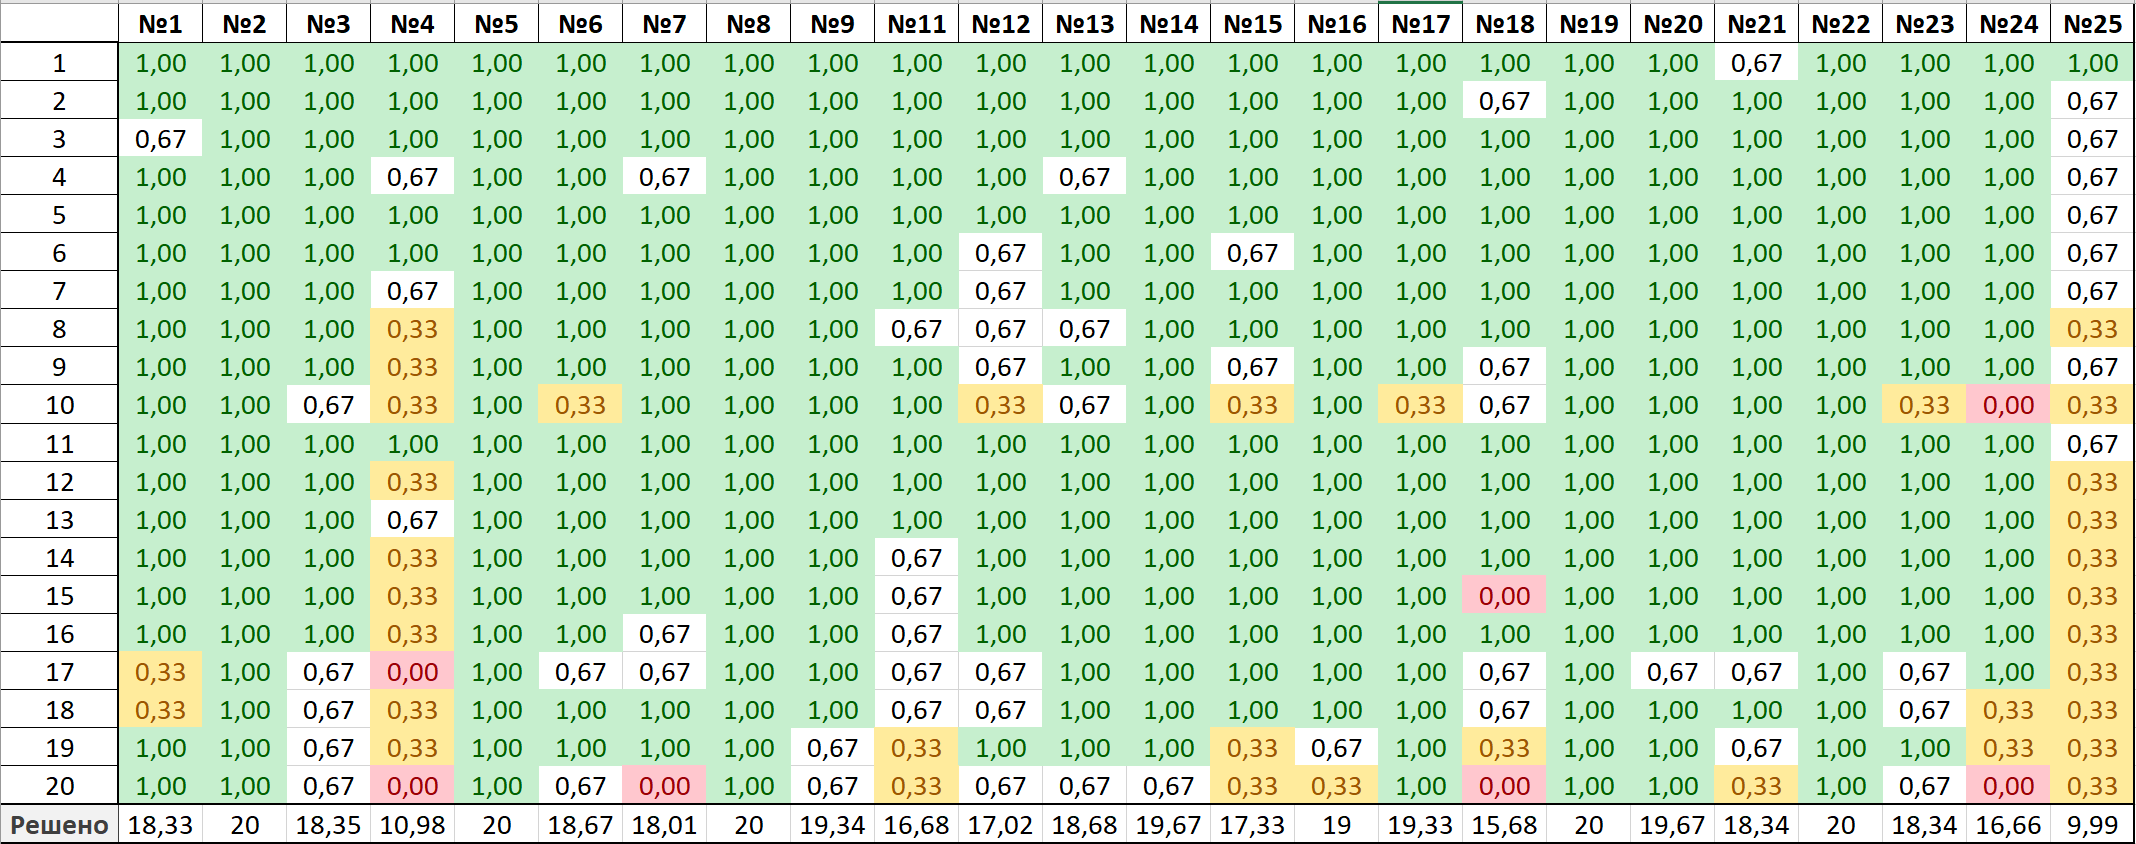